# Exercício 9

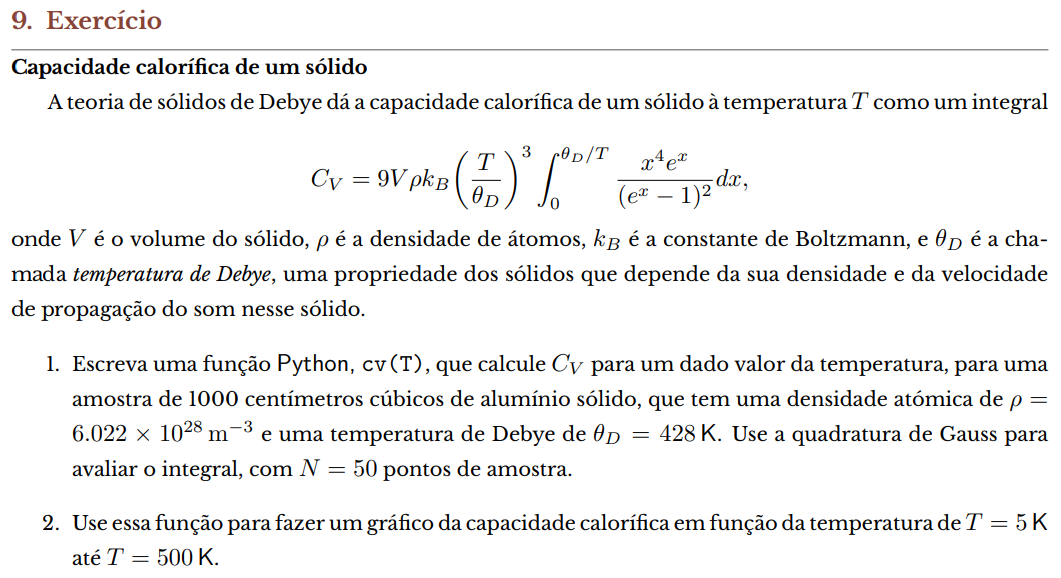

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from Testes import Integrais as test

from typing import Callable

## Alínea 1

### Quadratura de Gauss

In [94]:
def quadgausseasy(start: float, end: float, func: Callable, n: int) -> float:
    """
        Calcula o integral de `func` de `start` a `end` usando quadratura gaussiana com `n` pontos.

        ### Retorno
        Devolve o valor do integral.
    """

    # Determinar zeros e pesos
    xx, ww = np.polynomial.legendre.leggauss(n)

    # Fazer com que o integral seja de -1 a 1
    def f(x: float) -> float:
        return func((x + 1) * (end - start) / 2 + start)
    
    return  ((end - start) / 2) * np.sum(f(xx) * ww)


test.testeintegral(quadgausseasy, 10)

Integral de 1 de 0 a 1
Valor obtido: 1.0.
Valor esperado: 1.
Diferença relativa: 0.0%



Integral de x de 0 a 1
Valor obtido: 0.49999999999999994.
Valor esperado: 0.5.
Diferença relativa: 1.1102230246251565e-14%



Integral de x^2 de 0 a 1
Valor obtido: 0.33333333333333326.
Valor esperado: 0.3333333333333333.
Diferença relativa: 1.6653345369377348e-14%



Integral de sin(x) de 0 a pi
Valor obtido: 2.0000000000000004.
Valor esperado: 2.
Diferença relativa: 2.220446049250313e-14%





In [95]:
def bissect(func: Callable, a: float = 0, b: float = 1, eps: float = 10e-6) -> float:
    """
        Resolve a equação `func(x) = 0` usando o método da bisseção no intervalo [a, b] parando quando o erro for menor que `eps`.

        ### Retorno
        O valor x que é solução da equação.
    """

    erro = eps + 1
    while abs(erro) > eps:
        c = (a+b)/2

        fa, fb, fc = func(a), func(b), func(c)

        # Verificar se algum dos valores é um zero
        if fa == 0:
            return a
        elif fb == 0:
            return b
        elif fc == 0:
            return c

        # Troca de sinal em [a, c]
        elif fa * fc < 0:
            b = c
        
        # Troca de sinal em [c, b]
        elif fc * fb < 0:
            a = c
        
        # Não há troca de sinal
        else:
            print(a, func(a))
            print(b, func(b))
            raise ValueError("O sinal de f é o mesmo em a e b.")

        erro = (b - a)/2
    
    return (a+b)/2

    
def legendre(x: float, n: int) -> float:
    """
        Usa a relação de recorrência dos polinómios de Legendre para avaliar o polinómio de ordem `n` em `x`.
    """
    if n == 0:
        return 1
    
    elif n == 1:
        return x
    
    else:
        n -= 1
        return (2 * n + 1) / (n + 1) * x * legendre(x, n) - (n / (n + 1)) * legendre(x, n-1)
    


def gausselim(Ao: np.ndarray, bbo: np.ndarray) -> np.ndarray:
    """
        Resolve o sistema de N equações definido por Ao * xx = bbo usando eliminação gaussiana com pivotagem parcial.

        ### Argumentos
        Ao: Matriz N por N
        bbo: Vetor com N entradas
        
        ### Retorno
        xx: Vetor com N entradas
    """

    # Evitar side effects
    A = np.copy(Ao)
    bb = np.copy(bbo)

    N = bb.size

    # Fazer pivotagem usando um mapa de endereços
    mm = np.arange(0, N)
    for line in range(N):
        # Posição do maior elemento da coluna (tendo em conta as trocas já feitas)
        coluna = A[mm[line:], line]
        index = list(abs(coluna)).index(max(abs(coluna))) + line

        # Trocar os elementos
        mm[line], mm[index] = mm[index], mm[line]

    # Eliminação Gaussiana
    for i in range(N-1):
        piv = A[mm[i]][i]
        for j in range(i+1, N):
            coef = A[mm[j]][i] / piv
            A[mm[j]] -= A[mm[i]] * coef
            bb[mm[j]] -= bb[mm[i]] * coef

    # Substituição Regressiva
    xx = np.zeros(N)
    xx[-1] = bb[mm[-1]] / A[mm[N-1]][N-1]
    for i in range(N-1, -1, -1):
        xx[i] = (bb[mm[i]] - (A[mm[i]][i+1:] @ xx[i+1:])) / A[mm[i]][i]
    
    return xx


def quadgauss(start: float, end: float, func: Callable, n: int) -> float:
    """
        Calcula o integral de `func` de `start` a `end` usando quadratura gaussiana com `n` pontos.

        ### Retorno
        Devolve o valor do integral.
    """

    # Determinar os n zeros do polinómio de Legendre de ordem n
    
    # Estimativa inicial dos zeros (muito boa)
    kk = np.arange(1, n+1, 1)
    xx = (1 - 1/(8 * n**2) + 1/(8 * n**3)) * np.cos(np.pi / (4 * n + 2) * (4 * kk - 1))

    # Identificar totalmente os zeros usando o método da bisseção
    delta = 1 / (5 * n)
    for i in range(n):
        xx[i] = bissect(lambda x: legendre(x, n), xx[i] - delta, xx[i] + delta)


    # Determinar os pesos

    # Criar a matriz de coeficientes
    A = np.zeros((n, n))
    for i in range(n):
        A[i] = legendre(xx, i)
    
    # Criar o vetor do lado direito da equação
    bb = np.zeros(n)
    bb[0] = 2

    # Resolver a equação e obter os pesos
    ww = gausselim(A, bb)


    # Fazer com que o integral seja de -1 a 1
    def f(x: float) -> float:
        return func((x + 1) * (end - start) / 2 + start)
    
    return  ((end - start) / 2) * np.sum(f(xx) * ww)


test.testeintegral(quadgauss, 10)

Integral de 1 de 0 a 1
Valor obtido: 0.9999999999999999.
Valor esperado: 1.
Diferença relativa: 1.1102230246251565e-14%



Integral de x de 0 a 1
Valor obtido: 0.4999999999999999.
Valor esperado: 0.5.
Diferença relativa: 2.220446049250313e-14%



Integral de x^2 de 0 a 1
Valor obtido: 0.33333333333333315.
Valor esperado: 0.3333333333333333.
Diferença relativa: 4.9960036108132044e-14%



Integral de sin(x) de 0 a pi
Valor obtido: 2.0000000000005085.
Valor esperado: 2.
Diferença relativa: 2.5424107263916085e-11%





### Resolver o Exercício

O volume de $1000\text{cm}^3$ é igual a $1 \times 10^{-3}\text{m}^3$, o resto das grandezas já está em unidades SI.

Gráfico em unidades SI:


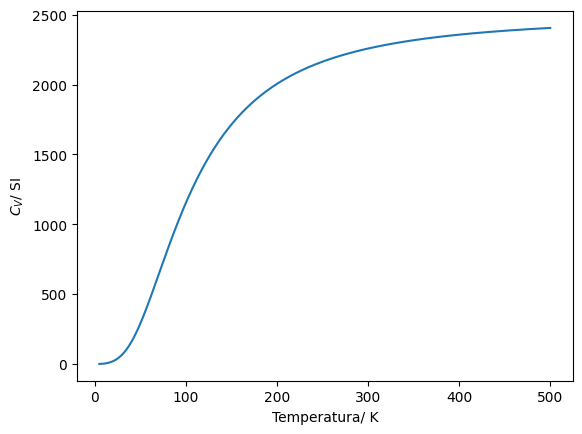

In [96]:
# Constantes
V = 0.001
kb = 1.381e-23
rho = 6.022e28
theta = 428

# Parâmetros
N = 50


# Função integranda
def f(x: float) -> float:
    return (x**4 * np.exp(x)) / (np.exp(x) - 1)**2


# Função para calcular C_V(T)
def cv(T: float) -> float:
    """
        Determina a capacidade calorífica de um sólido à temperatura T usando a teoria de sólidos de Debye, calculando o integral usando a quadratura gaussiana com 50 pontos.
    """

    integral = quadgausseasy(0, theta / T, f, 50)

    return 9 * V * rho * kb * (T / theta)**3 * integral


# CV em função de T
tt = np.linspace(5, 500, 500)
cc = [cv(t) for t in tt]


print("Gráfico em unidades SI:")
plt.plot(tt, cc)
plt.xlabel("Temperatura/ K")
plt.ylabel("$C_V$/ SI")
plt.show()